In [3]:
#hide
from fastai2.vision.all import *
from utils import *

In [81]:
def plot_points(X, y, yp=None, c1="r", c2="b"):
    plt.scatter(X, y, c=c1)
    if not yp is None:
        plt.scatter(X, yp, c=c2, marker="+")
        

In [82]:
X =  torch.arange(-4,4, 0.2).float()
X = X + 2 * torch.rand_like(X) 
y = 2 * X**2 - 4 * X + 3
y = y + 4 * torch.rand_like(X)

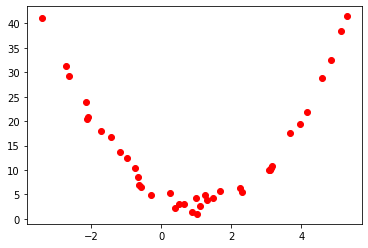

In [83]:
plot_points(X, y)

In [105]:
def f(X, params):
    a, b, c = params
    return a * (X**2) + (b * X) + c

def mse(y, yp): return ((y - yp)**2).mean()

In [106]:
lr = 3e-3

In [110]:
params = torch.zeros(3).requires_grad_()

In [111]:
def step(params, show=False):
    yp = f(X, params)

    loss = mse(y, yp)

    loss.backward()

    params.data -= params.grad.data * lr

    params.grad = None

    if show: plot_points(X, y, yp.data)
        
    plt.show()
    
    return yp, params

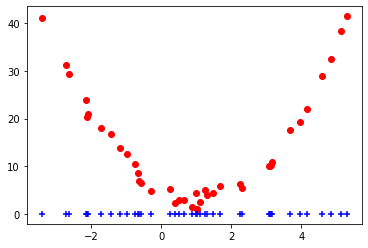

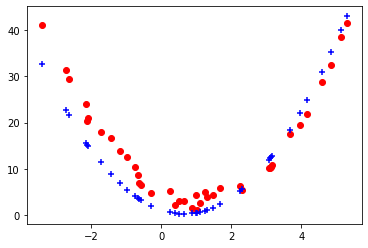

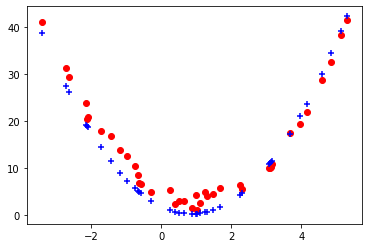

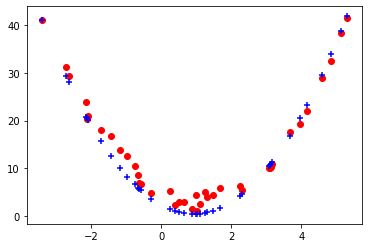

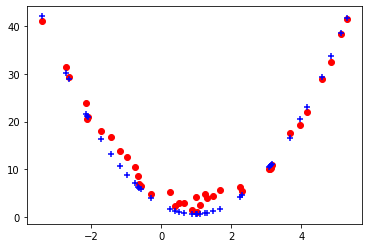

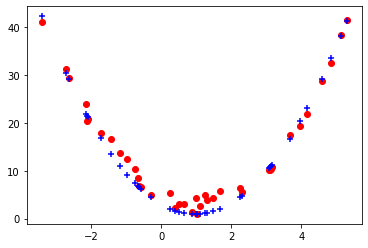

In [112]:
for i in range(300):
    _, params = step(params, i % 50 == 0)